# **IMPORT LIBRARIES**

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

# **IMPORT DATA, TEST/TRAIN SPLIT, SCALE**

In [3]:
features = pd.read_csv("../data/paris_lille/geometric_features.csv")

X = features.drop(['class'], axis=1)
y = features[['class']].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y)

# **BASELINE XGBOOST**

In [17]:
model = XGBClassifier()
model.fit(X_train, y_train)

[18:32:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=96, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.714     0.833     0.769        18
           Bench      0.000     0.000     0.000         1
    Bicycle Rack      1.000     0.875     0.933         8
Bicycle Terminal      1.000     1.000     1.000         5
         Bollard      0.957     0.985     0.971        67
        Building      1.000     1.000     1.000         9
Distribution Box      0.625     1.000     0.769         5
      Floor Lamp      1.000     1.000     1.000        23
          Island      0.800     1.000     0.889         4
Lighting Console      1.000     0.892     0.943        37
        Low Wall      0.900     1.000     0.947        18
      Mobile Car      0.800     0.308     0.444        13
      Mobile Van      1.000     1.000     1.000         1
         Natural      0.968     1.000     0.984        60
  Parked Bicycle      0.929     1.000     0.963        13
      Parked Bus      0.000     0.000     0.000         1
      Parked 

# **CONFUSION MATRIX**

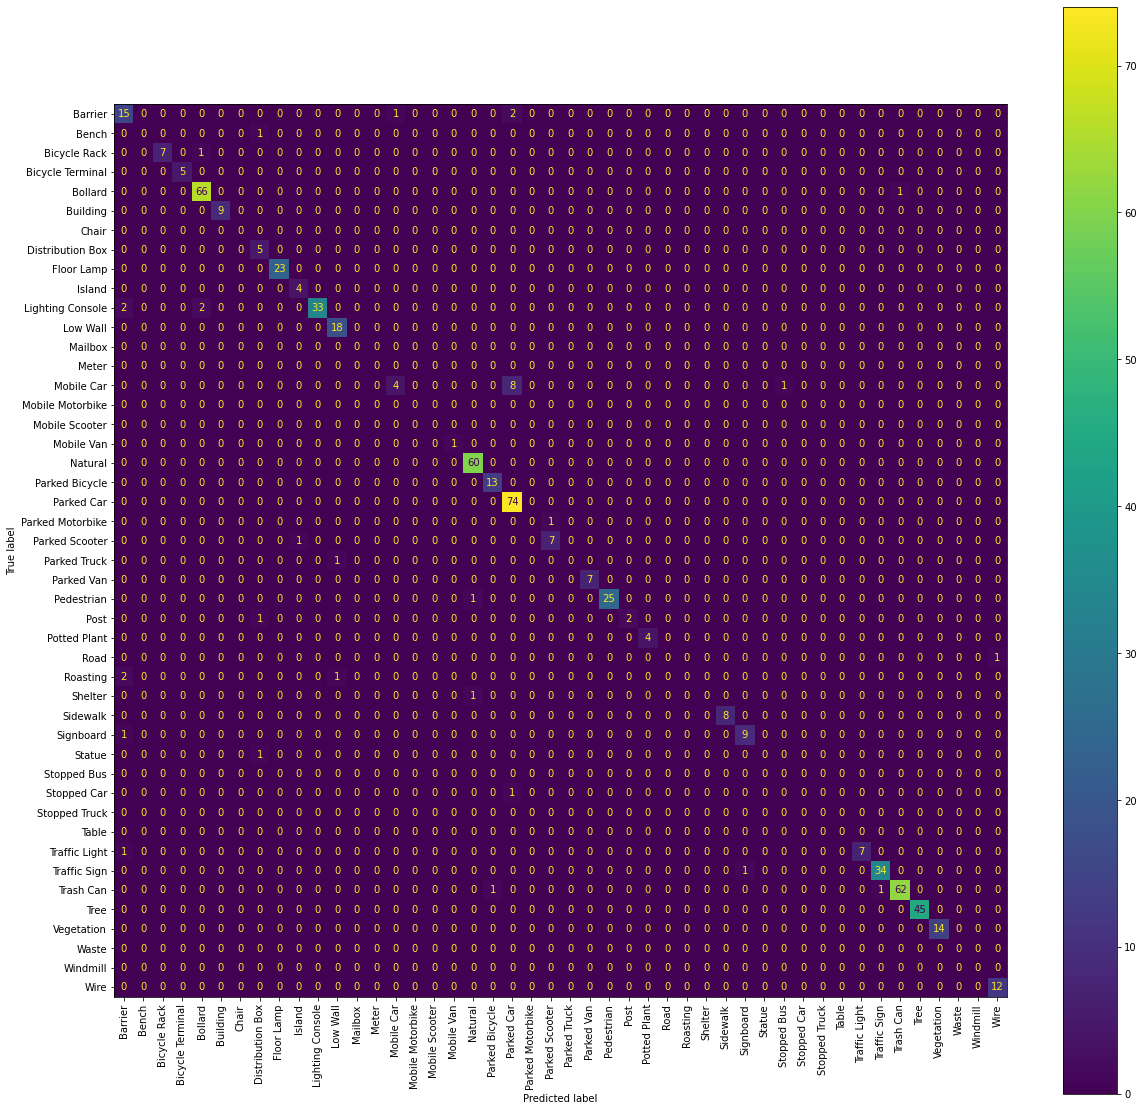

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cmd.plot(ax=ax, xticks_rotation='vertical');

plt.savefig('confusionmatrix_xgboost.png', dpi=600)

# **FEATURE IMPORTANCE**

In [14]:
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05022
Feature: 1, Score: 0.04901
Feature: 2, Score: 0.04696
Feature: 3, Score: 0.02245
Feature: 4, Score: 0.27668
Feature: 5, Score: 0.04316
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.18258
Feature: 8, Score: 0.32892


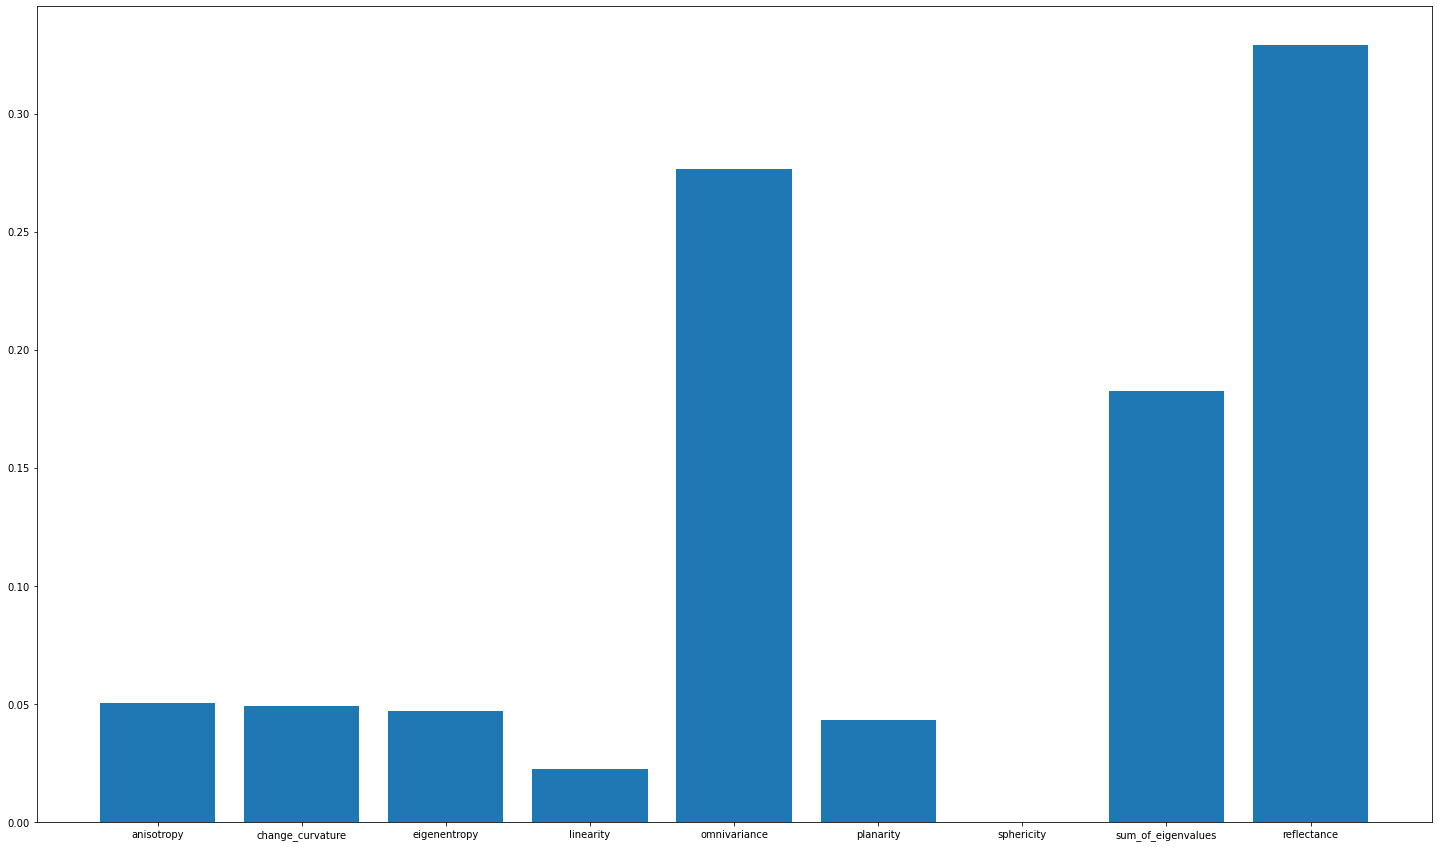

In [16]:
plt.figure(figsize=(25,15))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(range(len(model.feature_importances_)), X.columns)
plt.savefig('featureimportance_xgboost.png', dpi=600)
plt.show()